In [ ]:
# Importing all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import re
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning and Exploration

In [ ]:
df = pd.read_csv('/content/Dataset Assignment 1.csv')
df.sample(5)

,order_id,order_date,sku_id,product_name,final_ak_price,units_sold,quantity,customer_id,placed_gmv
1577,144398,2022-05-29 12:14:43,60759593ac,Tata Tea Premium UP ki Chai 500g,196.35,6,1,97137,1178.1
2607,142875,2022-05-27 17:23:34,60e7f9b80a,Clean & Clear Morning Energy Berry Face Wash 50ml,64.68,6,1,43145,388.08
4697,132864,2022-05-15 22:30:09,605dca3f34,Nycil Germ Expert Prickly Heat Powder Cool Her...,95.47,30,1,10809,2864.1
265,158583,2022-06-16 16:00:55,60b9b9cf00,Lakme Blush & Glow Strawberry Freshness Gel Fa...,176.25,6,1,129244,1057.5
287,142053,2022-05-26 21:51:26,60e2bb3760,Nihar Shanti Amla Hair Oil 300ml,79.84,18,1,103639,1437.12


In [ ]:
df.info()
# Order-id = unique IDs, int
# Order_date = Converting to datetime format for increased usability
# sku-id = unique id representing a product, can be more than one in an order
# Product name = object type
# final_ak_price = float seems to be correct dtype for selling price of the product
# Units-sold = No. of units sold: Given in int seems correct dtype
# quantity = Int dtype. No. of quantity in a single unit of the product
# Customer_id = Object dtype
# Placed GMV = Multiply SP*units_sold*quantity; Need to convert to float type
# Memory usage seems right

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   int64  
 1   order_date      5000 non-null   object 
 2   sku_id          5000 non-null   object 
 3   product_name    5000 non-null   object 
 4   final_ak_price  5000 non-null   float64
 5   units_sold      5000 non-null   int64  
 6   quantity        5000 non-null   int64  
 7   customer_id     5000 non-null   int64  
 8   placed_gmv      5000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 351.7+ KB


In [ ]:
# Understanding the numerical columns
print(df.final_ak_price.quantile(0.90))
print(df.units_sold.quantile(0.99))
print(df.quantity.quantile(0.90))
df.describe()

206.0250000000001
240.0
2.0


,order_id,final_ak_price,units_sold,quantity,customer_id
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,142974.591400,103.214882,27.291000,1.642000,65152.856400
std,12906.213563,143.368054,81.006115,3.094988,39852.026695
min,117277.000000,0.680000,1.000000,1.000000,376.000000
25%,132629.250000,31.465000,6.000000,1.000000,29307.000000
50%,144063.000000,57.000000,18.000000,1.000000,66945.000000
75%,154112.000000,112.400000,24.000000,1.000000,103689.500000
max,164211.000000,1344.000000,2400.000000,100.000000,133801.000000


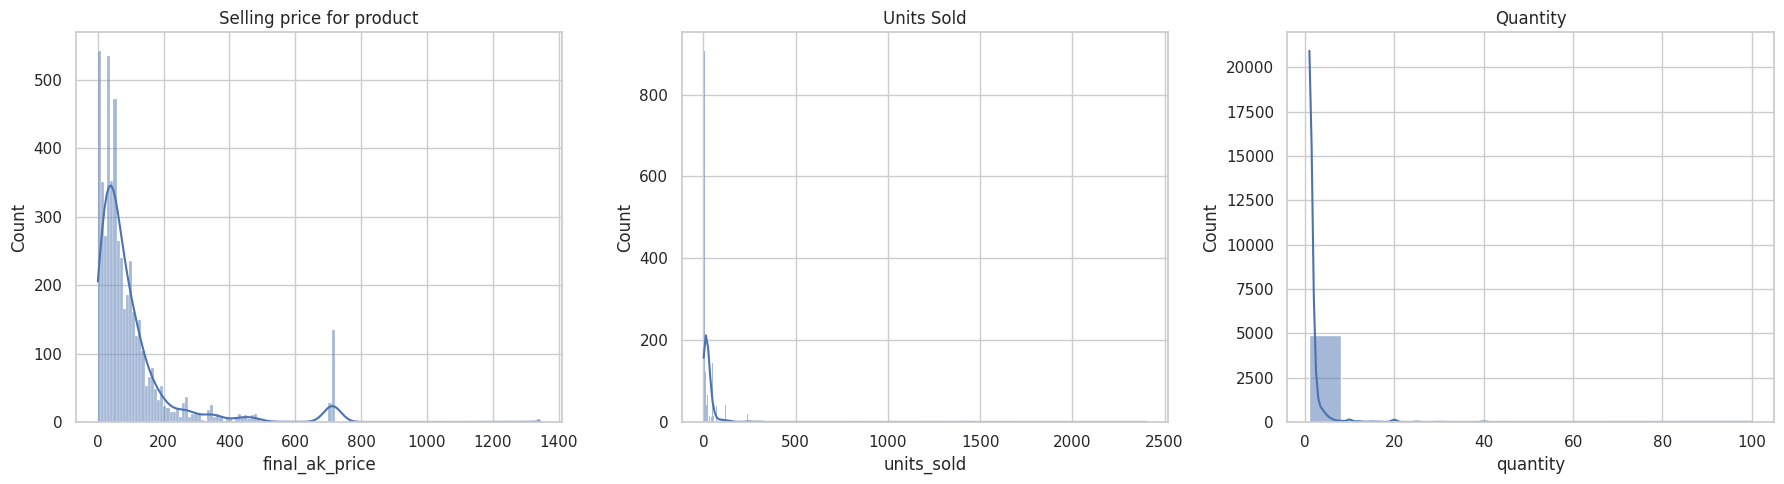

In [ ]:
# Checking univariate distribution of data through histogram and kde plot. The data is highly skewed
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df.final_ak_price,kde=True, ax=axes[0])
axes[0].set_title('Selling price for product')

sns.histplot(df.units_sold,kde=True, ax=axes[1])
axes[1].set_title('Units Sold')

sns.histplot(df.quantity, kde=True, ax=axes[2])
axes[2].set_title('Quantity')

plt.tight_layout()
plt.show()

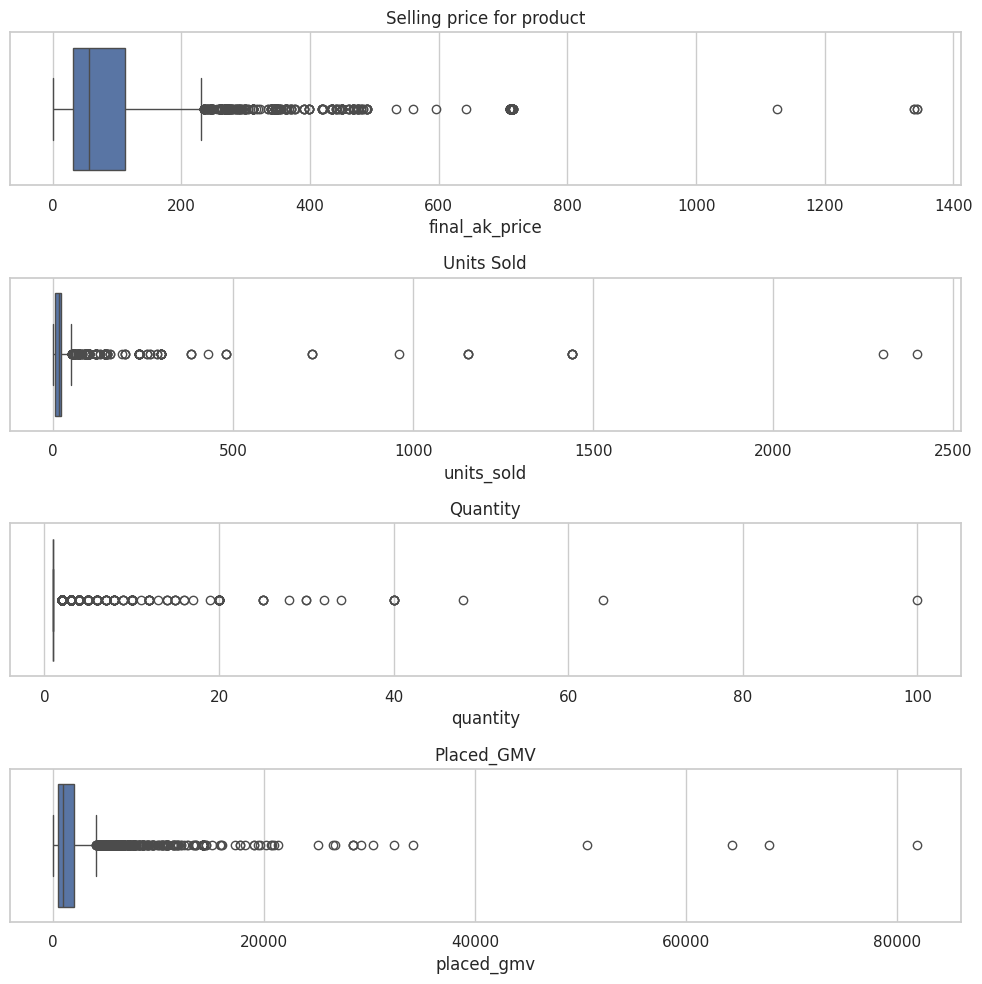

In [ ]:
# Understanding the outliers through boxplot
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

sns.boxplot(x=df["final_ak_price"], ax=axes[0])
axes[0].set_title('Selling price for product')

sns.boxplot(x=df["units_sold"], ax=axes[1])
axes[1].set_title('Units Sold')

sns.boxplot(x=df["quantity"], ax=axes[2])
axes[2].set_title('Quantity')

sns.boxplot(x=df["placed_gmv"], ax=axes[3])
axes[3].set_title('Placed_GMV')

plt.tight_layout()
plt.show()

In [ ]:
print(df.duplicated().sum())
# No duplicate rows

df.isna().sum()
# No missing values

0


order_id          0
order_date        0
sku_id            0
product_name      0
final_ak_price    0
units_sold        0
quantity          0
customer_id       0
placed_gmv        0
dtype: int64

In [ ]:
order_id = df[df.order_id.astype('str').str.len()!=6]
sku_id = df[df.sku_id.astype('str').str.len()!=10]
print(f"Checking number of rows with incorrect order id based on length assuming lenght is same for all = {len(order_id)}")
print(f"Similarly checking for sku_id = {len(sku_id)}")

Checking number of rows with incorrect order id based on length assuming lenght is same for all = 0
Similarly checking for sku_id = 0


In [ ]:
# Converting order_date into datetime column
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=False)

In [ ]:
# Perform analysis to find any inconcistency in the product_name column
df.groupby(['sku_id', 'product_name']).size().sort_values(ascending=False)

sku_id      product_name                                                         
619f2e47e1  Clinic Plus Strong & Long Sachet 960X6ml                                 92
60d17870c5  Glow & Lovely Instant Glow With Brightening Multivitamin Facewash 50g    64
619f2e47e1  Clinic Plus Strong & Long Sachet 960U X 6ml                              63
60686eeef8  Dermi Cool Prickly Heat Powder 150g + Dettol Cool Menthol 125g Free      57
5fa93040c2  Himalaya Purifying Neem Facewash 50ml                                    53
                                                                                     ..
619a88daac  Dukes Cream 4 Fun Biscuits Chocolate 150g                                 1
619F63F527  Keo Karpin Hair Oil 200ml                                                 1
6191f3c9bd  Aeroplane Rice Rozana Green 5 Kg                                          1
6191f0de0e  Aeroplane Rice 1121 Extra Long Grain 5 Kg                                 1
027d11564a  Lux Fresh Glow Soaps Mega 

In [ ]:
# Converting placed_gmv into float
df['placed_gmv'] = df.final_ak_price*df.units_sold*df.quantity.astype('float')
df.placed_gmv.dtype

dtype('float64')

In [ ]:
df.sample(10)

,order_id,order_date,sku_id,product_name,final_ak_price,units_sold,quantity,customer_id,placed_gmv
896,149152,2022-06-04 14:34:13,60897f5919,Dove Hair Fall Rescue Shampoo 180ml,140.21,24,1,24255,3365.04
209,149730,2022-06-05 11:00:00,6089807319,Patanjali Saundarya Face Wash 60ml,49.80,6,1,18498,298.80
4997,130373,2022-05-12 13:20:53,6163f711fe,Garnier Bright Complete Vitamin C Serum Cream ...,62.16,6,1,29765,372.96
2568,153765,2022-06-10 13:34:31,619f2e47e1,Clinic Plus Strong & Long Sachet 960X6ml,712.00,1,6,111763,4272.00
750,139433,2022-05-23 23:35:47,6149d9057a,Parle Orange Bite Candy 195g,35.00,24,2,57935,1680.00
2777,128793,2022-05-10 13:40:34,60d17870c5,Glow & Lovely Instant Glow With Brightening Mu...,55.44,12,1,66797,665.28
436,149157,2022-06-04 14:37:37,f6de2dc702,Lakme Sun Expert SPF 50 Ultra Matte Lotion 18ml,75.24,6,1,122968,451.44
959,128949,2022-05-10 16:49:26,60c499afa6,Parle Kacha Mango Bite Candy 198g,35.00,24,1,55223,840.00
3536,141333,2022-05-26 07:47:16,6137c39243,Garnier Black Naturals Shade 3.16 Burgundy 20m...,32.50,40,1,85776,1300.00
1099,135293,2022-05-18 21:59:49,6047142963,Glow & Lovely Instant Glow With Brightening Mu...,102.05,24,1,13508,2449.20


# Insight

### 1. Segemented the data based on grams and ML

<Axes: xlabel='measure'>

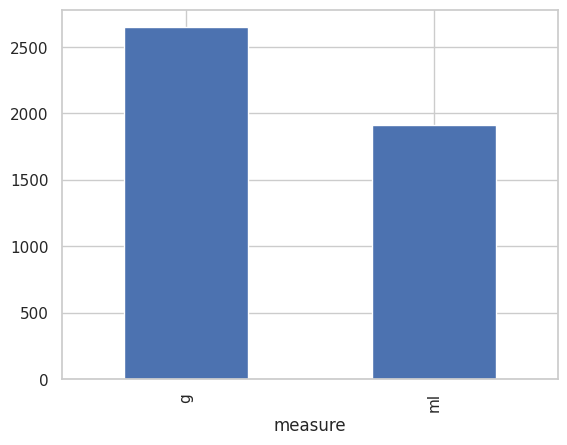

In [ ]:
df_insight = df.copy()
df_insight['unit'] = df.product_name.str.extract(r'(\d+\s*[gGmMmLl]+)')
df_insight['measure'] = df_insight['unit'].str.replace(r'\d+', '', regex=True)
def remove_size(text):
    return re.sub(r'(\d+\.?\d*)\s*([gGmMmLl]+)', '', text).strip()
df_insight['product_name_clean'] = df['product_name'].apply(remove_size)
df_insight.replace({' ml': 'ml', ' g':'g', 'gm': 'g', ' G':'g', 'G': 'g', ' L': 'ml', ' gm': 'g', 'L':'ml', 'mm':np.nan}, inplace=True)
df_insight.measure.value_counts().plot(kind='bar')

### 2. Saturday shows highest unit of sales

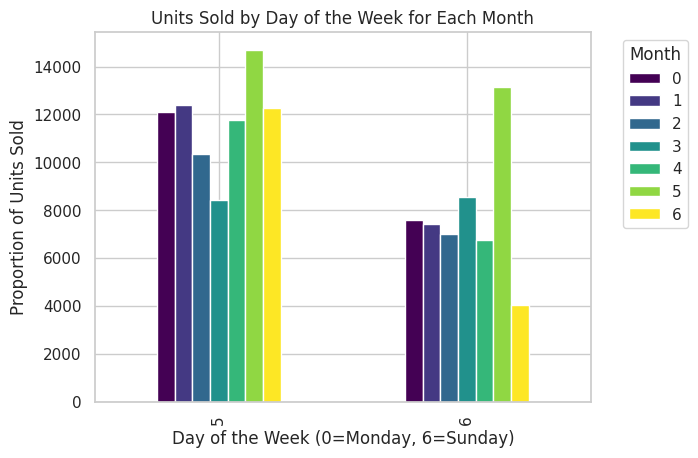

In [ ]:
insight = df_insight.assign(month = lambda x:x.order_date.dt.month,
                                  day_of_week = lambda x:x.order_date.dt.dayofweek
                                  ).groupby(["month", "day_of_week"])["units_sold"].sum().unstack()
insight.plot(kind='bar', colormap = 'viridis')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Units Sold by Day of the Week for Each Month')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Proportion of Units Sold')
plt.show()

# SQL questions

In [ ]:
!pip install sqlalchemy ipython-sql

In [ ]:
conn = sqlite3.connect(':memory:')
df.to_sql('df', conn, index=False, if_exists='replace')
query = "SELECT * FROM df limit 5"
result = pd.read_sql_query(query, conn)
# conn.close()
result

,order_id,order_date,sku_id,product_name,final_ak_price,units_sold,quantity,customer_id,placed_gmv
0,119566,2022-05-05 11:47:05,60d17870c5,Glow & Lovely Instant Glow With Brightening Mu...,56.45,6,1,99710,338.70
1,119566,2022-05-05 11:47:05,622854da66,Navratna Extra Thanda Ayurvedic Hair Oil 2.5ml,0.69,240,2,99710,331.20
2,119566,2022-05-05 11:47:05,61d439f99a,Dabur Amla Hair Oil 30ml,8.28,20,1,99710,165.60
3,119566,2022-05-05 11:47:05,60dec56d3e,Garnier Bright Complete Vitamin C Face Wash 50g,61.34,6,1,99710,368.04
4,119566,2022-05-05 11:47:05,61021fdb38,Patanjali's Saundarya Aloe Vera Gel 60ml,38.52,12,2,99710,924.48


In [ ]:
# Q1: Write a SQL query to find the Average order value, total number of orders, first order date, last order date, first order value, last order value of a customer.
query = """
WITH customer_order_summary AS (
    SELECT
        order_id,
        customer_id,
        placed_gmv,
        order_date,
        ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY order_date) AS rn_asc,
        ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY order_date DESC) AS rn_desc
    FROM df
)

SELECT
    customer_id,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(placed_gmv) AS avg_order_value,
    MIN(order_date) AS first_order_date,
    MAX(order_date) AS last_order_date,
    SUM(CASE WHEN rn_asc = 1 THEN placed_gmv ELSE 0 END) AS first_order_value,
    SUM(CASE WHEN rn_desc = 1 THEN placed_gmv ELSE 0 END) AS last_order_value
FROM customer_order_summary
GROUP BY customer_id;
"""

result = pd.read_sql_query(query, conn)
result

,customer_id,total_orders,avg_order_value,first_order_date,last_order_date,first_order_value,last_order_value
0,376,2,2152.28,2022-05-07 16:49:10,2022-05-13 22:46:40,1156.68,5220.00
1,750,1,337.68,2022-05-13 09:01:42,2022-05-13 09:01:42,225.36,225.36
2,1209,1,2138.40,2022-05-04 11:23:59,2022-05-04 11:23:59,2138.40,2138.40
3,1957,2,2671.30,2022-05-25 23:31:33,2022-06-01 17:23:13,3000.00,2403.90
4,2349,1,850.72,2022-05-18 10:27:15,2022-05-18 10:27:15,2130.00,2130.00
...,...,...,...,...,...,...,...
986,132137,1,1260.00,2022-06-20 14:01:50,2022-06-20 14:01:50,1680.00,1680.00
987,132428,1,1198.50,2022-06-21 19:34:19,2022-06-21 19:34:19,840.00,840.00
988,133057,1,2848.00,2022-06-21 23:40:57,2022-06-21 23:40:57,2848.00,2848.00
989,133647,1,5190.00,2022-06-23 13:15:11,2022-06-23 13:15:11,5190.00,5190.00


In [ ]:
# Q3: Write a SQL query to find out the top 3 articles for each customer in terms of placed_gmv.
query = """
WITH CTE1 AS (
  SELECT
        customer_id, product_name, sum(placed_gmv) as placed_gmv
  FROM df
  GROUP BY
    customer_id, product_name
),
CTE2 AS (
  SELECT *,
    ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY placed_gmv DESC) AS rn
  FROM CTE1
)
SELECT
  customer_id, product_name, placed_gmv
FROM CTE2
  WHERE rn <= 3;
"""
result = pd.read_sql_query(query, conn)
result

,customer_id,product_name,placed_gmv
0,376,Tata Tea Premium India ki Chai 1kg,8700.00
1,376,Odonil Bathroom Air Freshener 200g Buy 3 Get 1,1482.60
2,376,"Whisper Sanitary Pads - Ultra Clean XL+ , 7 Pads",1156.68
3,750,Mai Ghar Disinfectant Toilet Cleaner 1L,450.00
4,750,Surf Excel Mineral Bar 84g,225.36
...,...,...,...
2382,132428,Lizol Disinfectant Cleaner Citrus 500ml,1557.00
2383,132428,Dabur Red Paste 12U X 42g,840.00
2384,133057,Clinic Plus Strong & Long Sachet 960X6ml,2848.00
2385,133647,Tata Tea Premium India ki Chai 1kg,5190.00


## Q2: Identifying Top 20 Popular Products: A Multi-Faceted Approach
The definition of "popular" can vary in the retail context. Therefore, we'll explore multiple avenues to arrive at a well-rounded understanding of product popularity and selection.

**Methodological Considerations**
1. Profit-Based Approach:
- Rationale: High-profit products contribute significantly to business success.
- Methodology:
Track cost prices at current dates.
Calculate profit percentage for each product.
Rank products by profit percentage in descending order.
Select the top 20 products.
-Problem: The dataset doesn't contain these features

2. Units Sold Approach:
- Rationale: High sales volume is a direct indicator of product demand.
- Methodology:
Rank products by the number of units sold in descending order.
Select the top 20 products.
- Problem: The data is highly skewed and not comparable


3. Segmentation-Based Approaches:
- Rationale: Grouping products into categories can reveal distinct popularity patterns within each segment. We'll explore three segmentation methods:

- (a) Rule-Based Segmentation (Heuristic):
  
  Divide products into four categories based on final_ak_price after studying the box plots and taking median as the central value in skewed dataset.
  Select the top 5 products from each category.
- (b) Unsupervised Learning Segmentation:

  Apply clustering algorithms (e.g., K-Means++, DBSCAN) to group products based on relevant features (final_ak_price, units_sold, quantity).
  Select the top-performing products within each cluster.
- (c) NLP-Based Segmentation (Text Analysis):
  Analyze product names or descriptions to identify meaningful categories.
  Rank products within each category.

**Chosen Approach: K-Means++ Clustering**
Although DBSCAN is robust to outliers the algorithm is not used due to lack of specific domain knowledge with respect to given dataset (tuning hyperparameters become challenging). GMM is rejected because it assumes normal distirubtion but the given dataset was not normally distributed.
Therefore, After thorough analysis, I opted to use the K-Means++ algorithm for unsupervised segmentation based on three key features:

- final_ak_price
- units_sold
- quantity

**Rationale**:
K-Means++ addresses the initialization sensitivity of standard K-Means.

These three features capture the price, demand, and packaging attributes that often influence product popularity.

Clustering allows us to identify groups of products that exhibit similar popularity patterns, making it easier to pinpoint top performers within each segment.

4. Other approaches I can consider in future:
- Market basket analysis
- Collaborative recommendation system

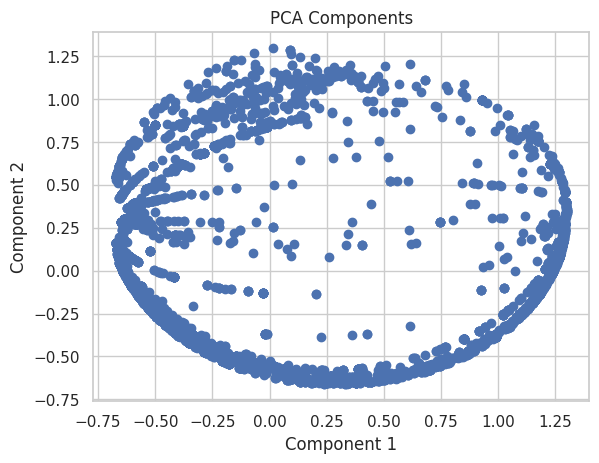

In [ ]:
# Pre-processing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
X = df[['final_ak_price', 'units_sold', 'quantity']]
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_pca = PCA(n_components=2).fit_transform(X_normalized)

# Visualising the Principal components (n=2)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

[Text(0.5, 0, 'Number of cluster (k)'),
 Text(0, 0.5, 'Sum Squared Error'),
 Text(0.5, 1.0, 'Elbow Method')]

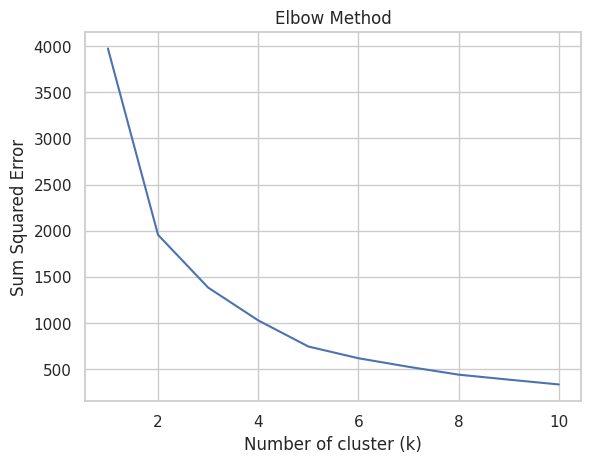

In [ ]:
# Finding optimal value of k via elbow method
from sklearn.cluster import KMeans
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2)
    kmeans.fit(X_normalized)
    sse.append(kmeans.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

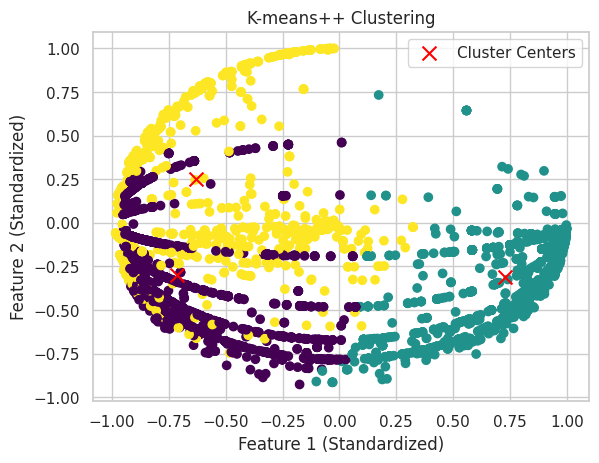

In [ ]:
# Chosing k = 3 as better distribution of categories compared to k=4 and k=2
k = 3
kmeans = KMeans(n_clusters = k, init='k-means++', random_state=2)
kmeans.fit(X_normalized)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
df['cluster_labels'] = labels

# Visualising the cluster centers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means++ Clustering')
plt.legend()
plt.show()

In [ ]:
# Counting and normalising the categories to pick number of top products
df.cluster_labels.value_counts(normalize=True)

cluster_labels
0    0.5262
1    0.2676
2    0.2062
Name: proportion, dtype: float64

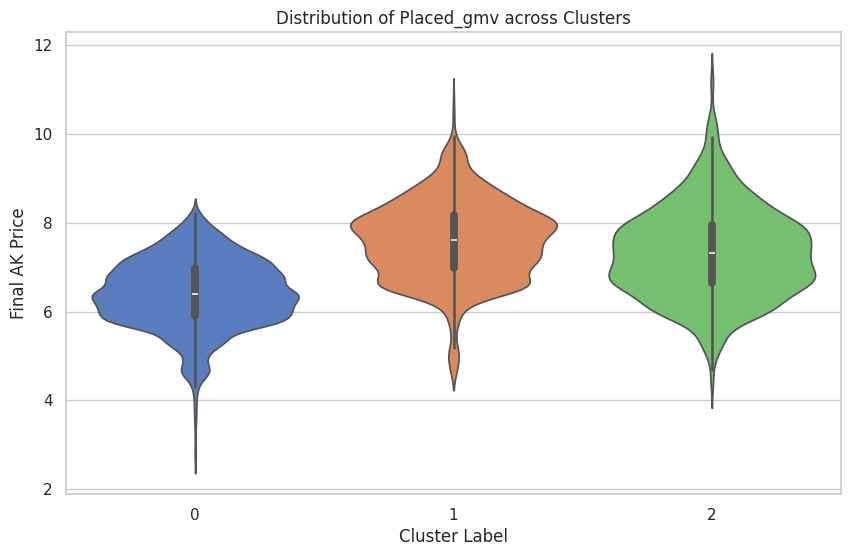

In [ ]:
# By analysis, I found that log transformation converts the skewed distribution of placed_gmv into normal distribution
df['placed_gmv_log'] = np.log(df['placed_gmv'])

# Visualising the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="cluster_labels", y="placed_gmv_log", data=df, palette="muted")
plt.xlabel('Cluster Label')
plt.ylabel('Final AK Price')
plt.title('Distribution of Placed_gmv across Clusters')
plt.show()

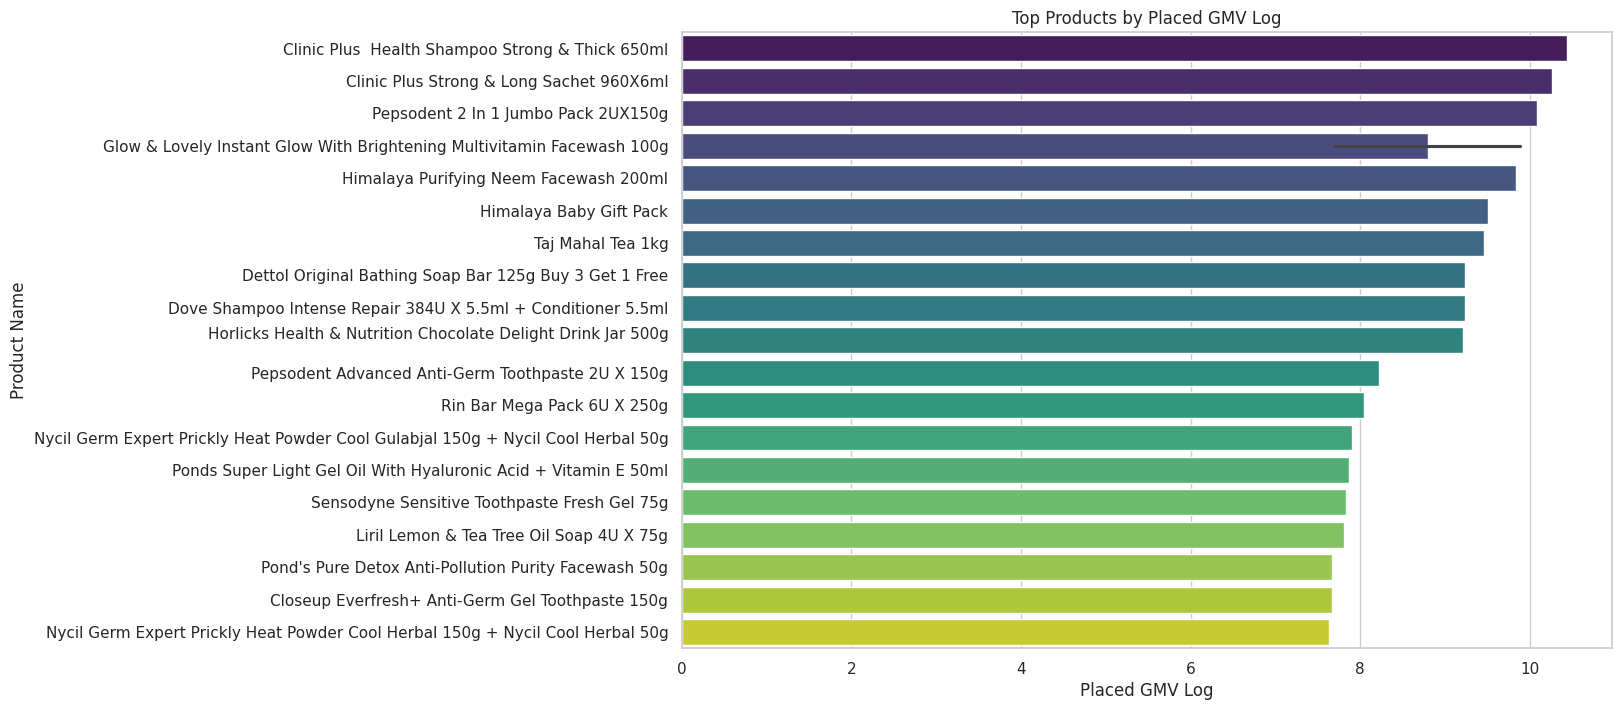

In [ ]:
# function to get top products for a given cluster and number of products
def get_top_products(cluster, num_products):
    return df[df.cluster_labels == cluster].groupby('product_name').placed_gmv_log.mean().sort_values(ascending=False).reset_index().iloc[0:num_products]

top_cluster_0 = get_top_products(0, 10)
top_cluster_1 = get_top_products(1, 6)
top_cluster_2 = get_top_products(2, 4)

# Combine the results into a single DataFrame
combined_df = pd.concat([top_cluster_0, top_cluster_1, top_cluster_2])
ranked_combined_df = combined_df.sort_values(by='placed_gmv_log', ascending=False).reset_index(drop=True)

# Visualize the product names and their placed_gmv_log values using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='placed_gmv_log',
    y='product_name',
    data=ranked_combined_df,
    palette='viridis'
)
plt.xlabel('Placed GMV Log')
plt.ylabel('Product Name')
plt.title('Top Products by Placed GMV Log')
plt.show()


# Rough Work for Top 20 products

#### 1. Trying NLP to label based on cosine similarity score but too many hindi words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 5000, stop_words =['english', 'hindi'])
vectors = vectorizer.fit_transform(df['product_name']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out()[200:300]

array(['70g', '70ml', '72ml', '72u', '740g', '750', '750ml', '75g',
       '75ml', '7g', '7ml', '7u', '80', '800ml', '80g', '80ml', '84g',
       '85ml', '860ml', '875g', '8g', '8ml', '8u', '90', '900g', '900ml',
       '90g', '90ml', '950g', '95ml', '960u', '960x6ml', '9g', '9ml',
       'aaa', 'aam', 'absolute', 'absorb', 'achari', 'acid', 'acne',
       'acno', 'action', 'activated', 'activator', 'active', 'adigo',
       'adrenaline', 'advance', 'advanced', 'advansed', 'aer',
       'aeroplane', 'after', 'agarbatti', 'ahaar', 'air', 'ajwain', 'ala',
       'aleo', 'alkaline', 'all', 'almond', 'aloe', 'aloevera', 'aloo',
       'alu', 'amchor', 'amino', 'amla', 'anand', 'and', 'anise', 'anti',
       'anticavity', 'antiseptic', 'apple', 'apricot', 'argan', 'aroma',
       'ash', 'assorted', 'athana', 'atta', 'attire', 'attract',
       'attraction', 'avenue', 'avocado', 'axe', 'ayur', 'ayurvedic',
       'baat', 'baby', 'bac', 'badam', 'badi', 'bags', 'bajaj', 'baking'],
      dtype

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity

In [ ]:
list(enumerate(similarity[0]))
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

#### 2. Working on analysing the distribution further

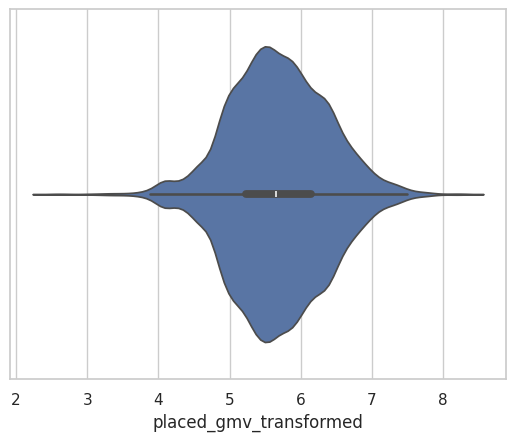

Optimal Lambda Value: -0.05749359064138034


,product_name,placed_gmv_transformed
0,Clinic Plus Health Shampoo Strong & Thick 650ml,7.849265
1,Pepsodent 2 In 1 Jumbo Pack 2UX150g,7.648386
2,Himalaya Baby Gift Pack,7.325947
3,Taj Mahal Tea 1kg,7.295687
4,Dettol Original Bathing Soap Bar 125g Buy 3 Ge...,7.162188
5,Horlicks Health & Nutrition Chocolate Delight ...,7.152619
6,Dove Shampoo Intense Repair 384U X 5.5ml + Con...,7.146031
7,Glow & Lovely Advanced Multivitamin Cream 25g,7.023238
8,Patanjali Dant Kanti Dental Cream Advance 100...,6.963948
9,Tresemme Keratin Smooth Shampoo 340ml,6.962902


In [ ]:
# Normalising the skewed data in placed_gmv based on box_cox transform which automatically finds optimal lambda value
from scipy import stats
def box_cox(df, col):
  df[col+'_transformed'], lambda_value = stats.boxcox(df[col])
  sns.violinplot(x = df[col+'_transformed'])
  plt.show()
  print(f'Optimal Lambda Value: {lambda_value}')
  return df[col]
transformed_col = box_cox(df, 'placed_gmv')
df.groupby('product_name').placed_gmv_transformed.mean().sort_values(ascending= False).reset_index().iloc[0:20]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['final_ak_price', 'units_sold', 'quantity']])
df[['final_ak_price1', 'units_sold1', 'quantity1']] = scaler.transform(df[['final_ak_price', 'units_sold', 'quantity']])

# Trying to give weighted score
df['final'] = 0.4*df.final_ak_price1 + 0.3*df.units_sold1 + 0.3*df.quantity1
df_col = box_cox(df, 'final')
df.groupby('product_name').final_transformed.mean().sort_values(ascending= False).reset_index().iloc[0:20]

In [ ]:
# def calculate_outliers(feature):
#   Q1 = df[feature].quantile(0.25)
#   median = df[feature].quantile(0.5)
#   Q3 = df[feature].quantile(0.75)
#   IQR = Q3 - Q1
#   print(f"IQR for {feature} is {IQR}")
#   upper_bound = Q3 + 1.5 * IQR
#   outliers = df[df[feature] > upper_bound]
#   median_value = df[df[feature].between(0, median)]
#   print(f"Number of median values for {feature} is {len(median_value)}")
#   print(f"Number of outliers for {feature} is {len(outliers)}")
#   print(outliers.product_name.to_list())
#   return outliers, median_value
# outlier, above_median = calculate_outliers('final')
# print(below_median.groupby('product_name').placed_gmv.mean().sort_values(ascending= False).reset_index().iloc[0:10])

#### 3. Trying to get sense of the data using scatter plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


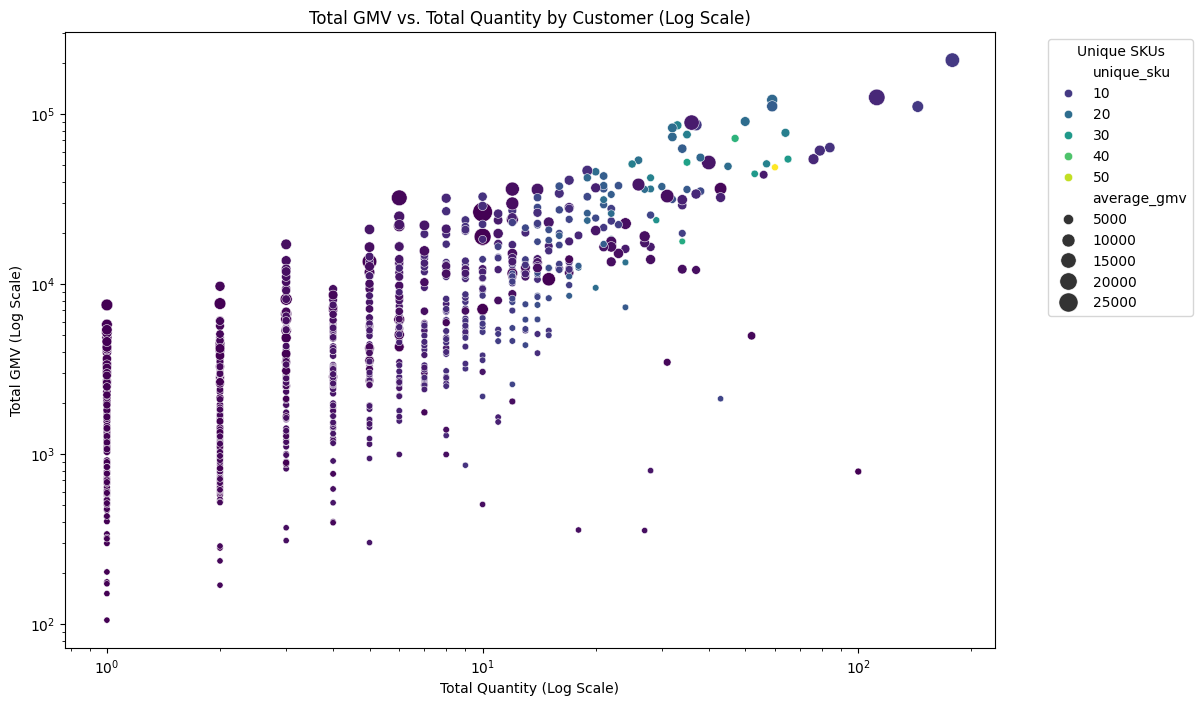

In [ ]:
insight= df_insight.groupby('customer_id').agg(unique_orders=('order_id', 'nunique'),
    sku_count=('sku_id', 'count'),
    unique_sku = ('sku_id', 'nunique'),
    total_quantity = ('quantity', 'sum'),
    total_gmv=('placed_gmv', 'sum'),
    average_gmv=('placed_gmv', 'mean')).sort_values(by='total_quantity', ascending=False).reset_index()
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=insight,
    x='total_quantity',
    y='total_gmv',
    hue='unique_sku',
    size='average_gmv',
    palette='viridis',
    sizes=(20, 200)
)
scatter.set(xscale='log', yscale='log')
plt.title('Total GMV vs. Total Quantity by Customer (Log Scale)')
plt.xlabel('Total Quantity (Log Scale)')
plt.ylabel('Total GMV (Log Scale)')
plt.legend(title='Unique SKUs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 4. Question 1 failed attempt

In [ ]:
# with
# CTE1 as
# (SELECT customer_id, order_id, order_date, sum(placed_gmv) as total_gmv, order_date
# from df
# group by customer_id, order_id
# having max(order_date) or min(order_date)
# order by order_date),
# CTE2 as (select *,
# count(*) over (partition by customer_id) as cnt,
# lead(total_gmv) over (partition by customer_id order by order_date) as last_order_value
# from CTE1),
# CTE3 as
# (select *,
# case when cnt=1 then coalesce(last_order_value, total_gmv) else last_order_value end as last_order_value1
# from CTE2),
# table2 as (
#   select customer_id, total_gmv as first_order_value, last_order_value1 as last_order_value from CTE3
# where last_order_value1 is not null)
# """
# query = """
# WITH table1 as (
# SELECT
#   customer_id,
#   round(avg(placed_gmv),2) as aov,
#   count(distinct order_id) as total_orders,
#   max(order_date) as last_order_date,
#   min(order_date) as first_order_date
# FROM
#   df
# GROUP BY
#   customer_id
# ),
# select * from table1
# --join table1 on table2.customer_id = table1.customer_id
# """

In [ ]:
#---Interview: Data Manipulation using SQL and pandas


In [ ]:
array = np.arange(1,10).reshape(3,3)
# array9 = np.random.randint(100,109, (3,3))
array9 = np.arange(100,109).reshape(3,3)
np.concatenate([array, array9], axis=1)
np.dstack([array, array9]) # np.vstack, np.hstack
np.array_split(array, 2) # Split no matter if not equally splitable
np.dot(array9, array) # array@array9
np.linalg.det(array) # Linalg for inverse, determinant...
np.argmax(array9)
# np.random.normal(10,111, (3,3))
# np.random.choice([10,12,13], (3,3))
# np.log, np.sqrt
#np.diag

array([[12, 12, 12],
       [13, 10, 10],
       [12, 13, 10]])

In [ ]:
# np.where(conditiion, True, False)
array = np.arange(1,10).reshape(3,3) #np.argwhere(condition).flatten()
# print(array)
np.sum(array, axis=0)
df = pd.DataFrame()

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([12, 15, 18])

In [ ]:
conn = sqlite3.connect(':memory:')
df.to_sql('df', conn, index=False, if_exists='replace')
query = "SELECT * FROM df limit 5"
result = pd.read_sql_query(query, conn)
# conn.close()
result

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/INterview/transaction_data.csv')
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [ ]:
df['gmv'] = df['NumberOfItemsPurchased']*df['CostPerItem']
# df.columns

In [ ]:
group = df.groupby(['Country', 'ItemCode']).gmv.agg('sum').sort_values(ascending=False).reset_index()#assign(rank = lambda x:x.groupby(['Country', 'ItemCode']).gmv.agg('sum').rank(method='dense'))
group

,Country,ItemCode,gmv
0,United Kingdom,465780,81443059.50
1,United Kingdom,1787079,1174030.92
2,United Kingdom,470883,1113334.92
3,United Kingdom,998886,836677.32
4,United Kingdom,1787583,780343.92
...,...,...,...
18673,United Kingdom,1665783,-671.04
18674,Israel,1780632,-757.44
18675,Israel,471954,-1127.04
18676,EIRE,-1,-12930.48


In [ ]:
# group.sort_values(['Country', 'ItemCode']).gmv
# df.query('rnk<=5')
group['rnk'] = group.groupby(['Country']).gmv.rank(method='dense', ascending=False)
group.query('rnk<=5').sort_values(by='Country')

,Country,ItemCode,gmv,rnk
969,Australia,477120,16394.16,4.0
926,Australia,477162,17271.36,2.0
971,Australia,470883,16389.12,5.0
626,Australia,484764,28062.72,1.0
963,Australia,456351,16519.68,3.0
...,...,...,...,...
7840,Unspecified,464898,451.44,4.0
7452,Unspecified,484596,498.24,3.0
6939,Unspecified,482160,584.28,1.0
7024,Unspecified,487956,574.56,2.0


In [ ]:
"""
WITH GMV_CALCULATION as
(
  SELECT COUNTRY, ITEMCODE, SUM(COSTPERITEM*NUMBEROFITEMPURCHASED) as GMV
  from df
  group by COUNTRY, ITEMCODE
),
WITH RANKED_GMV as
(
SELECT Country, ItemCode, GMV, DENSE_RANK() OVER (partition by Country order by GMV DESC) as dnr
from GMV_CALCULATION
)
SELECT COUNTRY, ITEMCODE, GMV
FROM RANKED_GMV
WHERE dnr<=5
"""

In [ ]:
# matrix = [[1,2,3], [4,5,6]]
# len(matrix[0])

3

In [ ]:
# matrix = [[1,1,1],[1,0,1],[1,1,1]]
# stored=[]
# for i in range(len(matrix)):
#     for j in range(len(matrix[0])):
#         if matrix[i][j] == 0:
#             stored.append([i,j])

# for m in range(len(stored)):
#     for j in range(len(matrix[0])):
#         matrix[stored[m][0]][j] = 0
#     for i in range(len(matrix)):
#         matrix[i][stored[m][1]] = 0
# matrix

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]